In [522]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [523]:
img01=cv2.imread('DATA/PT01.png')
img02=cv2.imread('DATA/PT02.jpg')
img01=cv2.cvtColor(img01,cv2.COLOR_BGR2RGB)
img02=cv2.cvtColor(img02,cv2.COLOR_BGR2RGB)
img01 = cv2.resize(img01,(500,600))
img02 = cv2.resize(img02,(500,600))

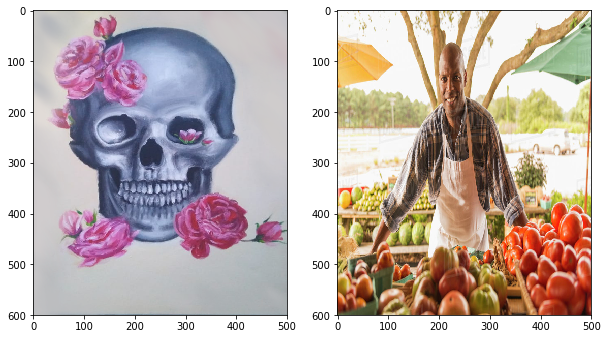

In [524]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img01)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img02)

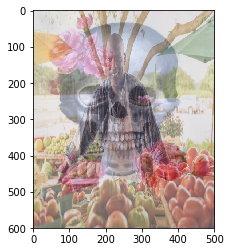

In [525]:
blended=cv2.addWeighted(src1=img01,alpha=0.5,src2=img02,beta=0.5,gamma=0)
plt.imshow(blended)

In [526]:
def draw(event,x,y,flags,param):
    global blended
    #X Mapping
    R01 = (1-0)/(500-0)
    M01 = 0+(x*R01)+R01
    #print(M01)
    #Y Mapping
    R02 = (1-0)/(600-0)
    M02 = 0+(y*R02)+R02
    #print((1-M02))
    blended=cv2.addWeighted(src1=img01,alpha=M01,src2=img02,beta=1-M02,gamma=1)
    blended=cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)

In [324]:
cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback('my_drawing',draw)
while True : 
    
    cv2.imshow('my_drawing',blended)
    if cv2.waitKey(20) & 0xFF == 27 : 
        break
cv2.destroyAllWindows()

In [1515]:
x_offset=0
y_offset=0
img01=cv2.imread('DATA/PT03.jpg')
img02=cv2.imread('DATA/PT02.jpg')
img01=cv2.cvtColor(img01,cv2.COLOR_BGR2RGB)
img02=cv2.cvtColor(img02,cv2.COLOR_BGR2RGB)
print(img01.shape)
print(img02.shape)

(160, 286, 3)
(801, 1200, 3)


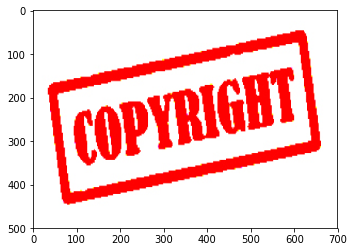

In [1516]:
img01 = cv2.resize(img01,(700,500))
plt.imshow(img01)

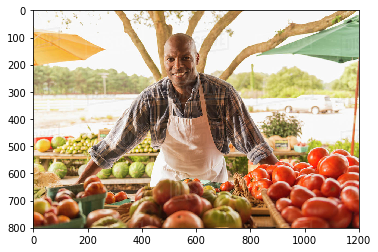

In [1517]:
plt.imshow(img02)


In [1518]:
x_offset = np.size(img02, 1) - np.size(img01, 1)
y_offset = np.size(img02, 0) - np.size(img01, 0)
print(y_offset,x_offset)

301 500


In [1519]:
rows,cols,channels=img02.shape

In [1520]:
rows

801

In [1521]:
cols

1200

In [1522]:
roi=img02[y_offset:801,x_offset:1200]

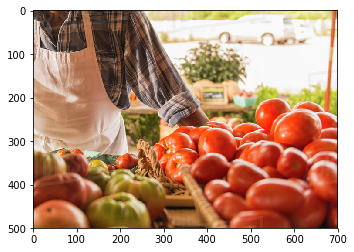

In [1523]:
plt.imshow(roi)

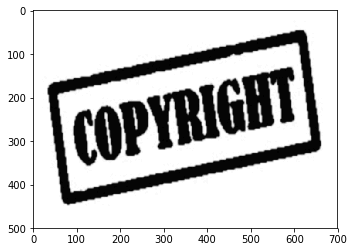

In [1524]:
blur = cv2.GaussianBlur(img01,(5,5),0)
imgtmp = cv2.medianBlur(blur,3)
img_yuv = cv2.cvtColor(imgtmp, cv2.COLOR_RGB2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = 255
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
# convert the YUV image back to RGB format
img01x = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

img1gray = cv2.cvtColor(img01x,cv2.COLOR_RGB2GRAY)
img1gray = cv2.filter2D(img1gray,-1,kernel)
plt.imshow(img1gray,cmap='gray')

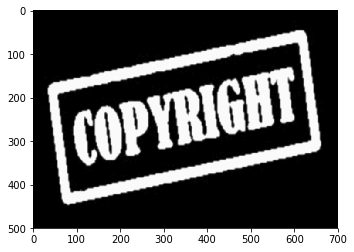

In [1525]:
# inverse the color
mask_inv = cv2.bitwise_not(img1gray)
#mask_inv=cv2.equalizeHist(mask_inv)

plt.imshow(mask_inv, cmap = 'gray')


In [1526]:
mask_inv.shape

(500, 700)

In [1527]:
#Make the map with three dimension
white_img = np.full(img01.shape, fill_value=255, dtype = np.uint8)
white_img.shape

(500, 700, 3)

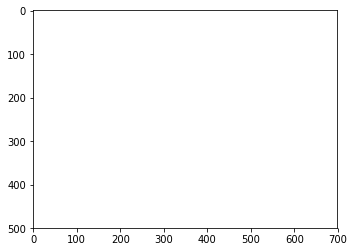

In [1528]:
plt.imshow(white_img)

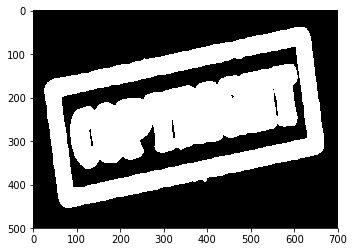

In [1529]:
#Map the image on the white image
mask_inv = cv2.blur(mask_inv,(5,5))
mask_inv = cv2.blur(mask_inv,(5,5))
mask_inv = cv2.blur(mask_inv,(5,5))
mask_inv = cv2.blur(mask_inv,(5,5))
mask_inv = cv2.blur(mask_inv,(5,5))
mask_inv = cv2.blur(mask_inv,(5,5))
mask_inv = cv2.blur(mask_inv,(3,3))
mask_inv = cv2.blur(mask_inv,(3,3))
bk = cv2.bitwise_and(white_img, white_img, mask = mask_inv)
plt.imshow(bk)

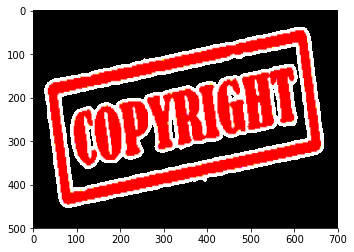

In [1561]:
# Map the image on the img_2 
fg = cv2.bitwise_or(img01, img01, mask = mask_inv)
plt.imshow(fg)

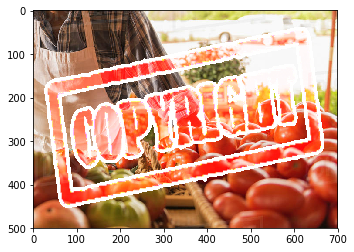

In [1564]:
final_roi=cv2.bitwise_or(fg,roi)
plt.imshow(final_roi)

In [1565]:
largeimg=img02

In [1567]:
largeimg[y_offset:y_offset+img01.shape[0],x_offset:x_offset+img01.shape[1]]=final_roi

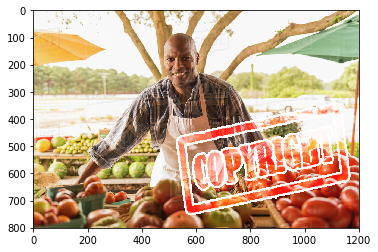

In [1568]:
plt.imshow(largeimg)